岭回归是线性回归的正则化版，在损失函数上直接加上一个正则化$\alpha \sum_{i=1}^{n}{\theta_i}^2$
岭回归一种专用于共线性数据分析的有偏估计回归方法，实质上是一种改良的最小二乘估计法，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法，对病态数据的拟合要强于最小二乘法。

#上面的话不知道在说什么不重要，只需要记住一句就好了
岭回归就是调节alpha 来获得一个稳定性和精度都还可以的模型，即方差和偏差都不是很大

In [2]:
from sklearn import linear_model
X=[[0,0],[0,0],[1,1]]
y=[0,0.1,1]
reg=linear_model.Ridge(alpha=0.5)
reg.fit(X,y)

d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [3]:
reg.coef_

array([0.34545455, 0.34545455])

In [4]:
reg.intercept_

0.13636363636363638

In [5]:
#交叉验证
import numpy as np
from sklearn import linear_model
reg=linear_model.RidgeCV(alphas=np.logspace(-6,6,13))
reg.fit(X,y)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [12]:
#绘制岭回归系数
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#x是希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)


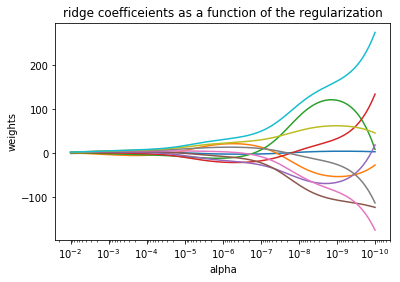

In [15]:
#岭回归的参数随着alpha的变化
n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)

coefs=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

ax=plt.gca()

ax.plot(alphas,coefs)
ax.set_xscale('log')#轴放缩
ax.set_xlim(ax.get_xlim()[::-1])#x轴换向

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('ridge coefficeients as a function of the regularization')
plt.axis('tight')
plt.show()
    

这个图说明了些什么呢？
当alpha变大的时候，正则化效应支配平方损失函数，并且系数趋于0，当alpha不断变小并趋近于0
的时候，系数呈现较大的震荡
通过确定alpha的值可以使得模型在偏差和方差之间达到平衡，随着alpha的增大，模型的方差减小，偏差增大。我们希望模型在稳定性和预测准确度上都比较好。

方差：是模型每一次输出结果与模型输出期望之间的误差，即模型的稳定性。描述数据离散程度，数据波动性，会影响模型的预测结果
偏差：预测值和真实值之间的差距，针对样本数据。偏差越大，越偏离真实数据集。用来衡量测定结果的精密度高低。